## Introduction

Machine learning has been an extremely popular in the modern society, but the accuracy and its limit are still a mystery that countless scientists are trying to unveil. In this report, the focus is to explore an unsupervised machine learning using the function `knn`. The main goal of this function is to predict an image consist of numbers representing the their brightnesses by examining the distance of the testing image and the training images. This report aim to explore accuracy of this function with various sizes of training data and the amount of neighbors. In addition, the different approaches when computing the distances. The illustration will be consist of plots, matrices, and a heatmap.

## Importing the Libraries

In [54]:
import gzip
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Importing and Formating the Data

In [2]:
with gzip.open("train-images-idx3-ubyte.gz","rb") as foo: #opening downloaded training images
    f=foo.read()

In [3]:
images=np.array([b for b in f[16:]]).reshape(-1,28*28) #reshaping the images to increase readibility

In [4]:
with gzip.open("train-labels-idx1-ubyte.gz","rb") as foo: #opening downloaded training images
    f=foo.read()

In [5]:
labels=np.array([b for b in f[8:]]) #discarding the first 8 indicies since they don't contain actual labels

In [98]:
train_num=10000 #setting up training and testing data for the initial confusion matrix
test_num=1000

train_images=images[:train_num]
train_labels=labels[:train_num]


test_images=images[-test_num:]
test_labels=labels[-test_num:]

In this section, the emphasis is on importing the data downloaded from the MNIST database using the gzip.open function, then discarding the first few indicies that are not needed for this report. After that, reshaping the images to forms that can be interpreted by human beings. 

## The Main Function: knn()

In [9]:
def dist(x,w): #computing distance between two arrays
    a=x-w
    a=a**2
    a=a.sum(axis=1)
    a=a**0.5
    return a

In [11]:
def n_smallest(a,n): #getting the n smallest indicies
    b=a.argsort()
    b=b[:n]
    return b

In [13]:
def knn(training_data,training_labels, x, n):
    neighbors=[]
    neighbors=(dist(training_data,x)) #computing the distance between the test and the training data
    neighbors=np.array(neighbors)
    nibors=n_smallest(neighbors,n) #getting the n closest neighbors
    niborlabels=np.array(training_labels[nibors])
    keys,values=np.unique(niborlabels,return_counts=True)
    maxindex=np.argmax(values) #getting the mode of the neighbors
    return keys[maxindex]

In this section, the emphasis is on completing the main function of this report, `knn`. This function started creating an empty array, neighbors, to store the closest n neighbors computed by knn using the training data. The process of calculating the distance is basically comparing each training image and the testing image by bytes. First of all, subtracting each training image to the testing image. Second, adding each row up by specifying the axis. Last but not least, taking the square root on all of them to get the distance between the images. Then, using the function `n_smallest` to get the indicies of the images with the least distances from the testing image, by implementing `argsort` on those. Next, using `np.unique` to get the labels that appear in `niborlabels`, which takes the output of `n_smallest` and maps out the corresponding labels. There are two outputs from `np.unique`, which are the labels and their occurences. At the end, the function returns the mode of the labels by using `argmax`, and that's the prediction of the testing image produced by this function. 

## Accuracy

In [72]:
def prediction(test_images,n): #getting all the computed predictions generating from knn
    pre=[]
    for i in test_images:
        pre.append(knn(train_images,train_labels,i,n))
    pre=np.array(pre)
    return pre

In [59]:
def acc(n): #computing the accuracy of the result
    accuracy=(prediction(test_images,n)==test_labels).sum()/len(test_labels)
    return accuracy

In [101]:
acc(5)

0.965

This section is to test out the accuracy of the function `knn`. The first step is to run the function on $1000$ testing images that are not part of the training data, and get the predictions generating from the function, more precisely the best guesses of the labels of each testing image. Next, comparing the predictions with the actual labels given from the training data. To quantify the accuracy, the `acc` function takes all the correct guess, then divide them with the total amount of testing images to get the percentage of correctness, which is the accuracy. In this model, the testing images were set to be $1000$ from the end of the list, and the neighbors amount was set to $5$. The accuracy of it is $0.965$, which indicates that $965$ out of the $1000$ images were computed correctly, which is a very satisfying result. 

## Confusion Matrix

In [37]:
confusion=np.zeros((10,10)) #setting up confusion matrix
confusion

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [38]:
for p in zip(test_labels,predictions): #adding values to the confusion matrix
    confusion[p[0],p[1]]+=1
confusion

array([[ 95.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.],
       [  0., 111.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   1.,  94.,   0.,   1.,   0.,   0.,   1.,   0.,   0.],
       [  0.,   0.,   3.,  97.,   0.,   2.,   0.,   1.,   0.,   0.],
       [  0.,   1.,   0.,   0.,  98.,   0.,   1.,   0.,   0.,   6.],
       [  0.,   0.,   0.,   1.,   0.,  93.,   0.,   0.,   1.,   0.],
       [  2.,   0.,   0.,   0.,   0.,   1., 100.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,  96.,   1.,   0.],
       [  0.,   3.,   0.,   6.,   1.,   0.,   1.,   1.,  73.,   1.],
       [  0.,   0.,   0.,   1.,   2.,   0.,   0.,   2.,   0.,  99.]])

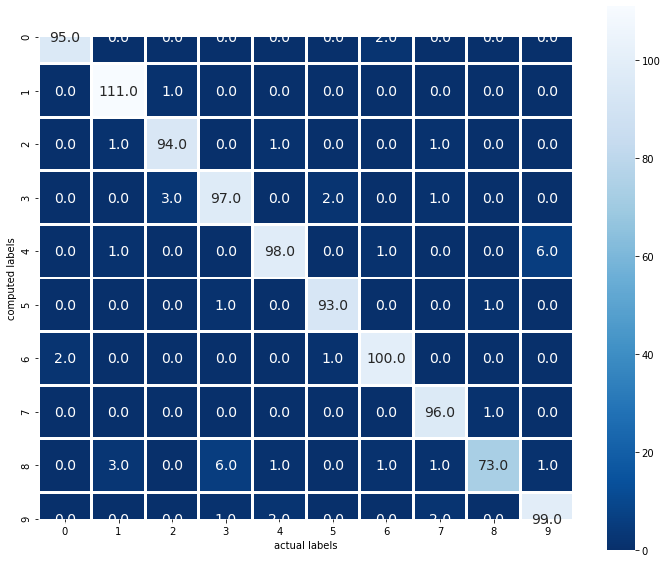

In [53]:
plt.figure(figsize=(12, 10))  # adjust figure size

sns.heatmap(confusion,
            annot=True,
            annot_kws={"fontsize": 14},   # adjust font size
            fmt='.1f',    # formatting of numbers
            linewidth=2, 
            square=True,
            cmap='Blues_r'

           );
plt.xlabel("actual labels")
plt.ylabel("computed labels")
plt.show()

In this section, the empasis is using a confusion matrix to break down the accuracy for each number. First, setting up the confusion matrix by creating a $10$ by $10$ numpy array. Second, zipping the predictions and the actual labels together then looping over it. For each value pair, mapping their corresponding label onto the matrix. After completing the matrix, it was set to form a heatmap that utilizes different brightness of colors to indicate the occurences, also it increases readibiliy. In the heatmap, the numbers that were predicted wrong were shown very clearly. It seems like the highest incorrect occurences from our test is $6$. There are two of them, $9$ getting mistaken for $4$, and $3$ getting mistaken for $8$. This is actually reasonable since in both cases the composition of the numbers are really similar, and they were also often getting mistaken for by human in the real world, especially when the numbers were not written in a rush or being connected with other digits. 

## Accuracy For Various Training Data & Neighbors

In [87]:
def train_images_function(n): #generating different sizes of training data
    t=images[:n]
    return t

In [88]:
def train_labels_function(n):
    t=labels[:n]
    return t

In [91]:
def prediction_for_plots(train_amount,n): #predictions but allows changing training data size
    pre=[]
    for i in test_images:
        pre.append(knn(train_images_function(train_amount),train_labels_function(train_amount),i,n))
    pre=np.array(pre)
    return pre

In [92]:
def acc_for_plots(train_amount, n): #acc but allows changing training data size
    accuracy=(prediction_for_plots(train_amount,n)==test_labels).sum()/len(test_labels)
    return accuracy

In this section, the emphasis is on computing the accuracy with different sizes of training data and different amount of neighbors. There were quite a few funtions being defined here. However, they were almost the same functions from the previous section, the only difference is that the sizes of training data is being accounted for. For that reason, they were given one more parameter as the `train_amount`. The purpose is to alter the sizes of training data, and observe the differences between them. In this model, the sizes of the data were chosen to be the mulitples of $2000$, ranging from $2000$ to $12000$. The amount of neighbos were chosen to be $3$, $5$, and $7$. From the plots below, it shows that the lowest accuracy occurs when the size equals $2000$ with the accuracy being around $0.932$, and the highest occurs at $12000$ with the accuracy being around $0.967$. This shows a positive association between the sizes of data and the accuracy. This is reasonable since the more data in the model the more probable that there are images that appear very similar to the testing images, especially with the ones that could be very ambigious. Even though there appears to be a postive association, the difference is marginal. The increments of each accuracy are only about $1$ percent, and it decreases as the data size increases. On the other hand, the amount of neighbors seem to not make a significant differnce on the accuracy. From the plots below, only the first one has an increase in accuracy as the neighbors increase. Even in that case, the increment is also not very noticeable with less than a half percent increase. In all the other cases, the accuracies fluctuate with different amount of neighbors. This inidcates that the amount of neighbors might not be a significant factor in this model.

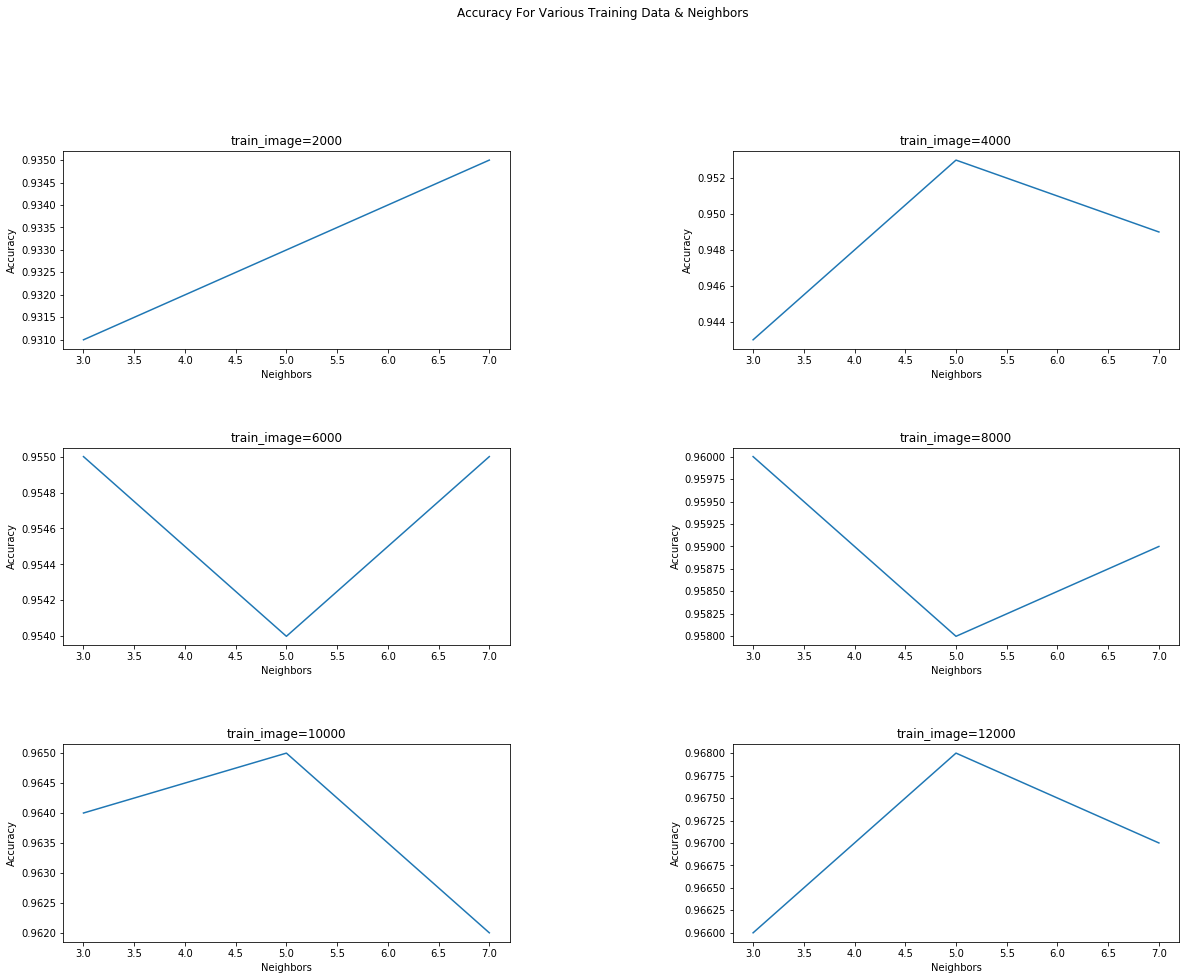

In [104]:
image_range=[2000,4000,6000,8000,10000,12000] #different sizes of training data
neighbor_range=[3,5,7] #altering amount of neighbors
accuracy_each_range=[]
plot_title_placeholder=[]
for i in image_range: #computing the accuract for each training data size and neighbor amount
    plot_title_placeholder.append(i)
    for j in neighbor_range:
        accuracy_each_range.append(acc_for_plots(i,j))
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.5,wspace=0.5)
for c in range(1,7):
    plt.subplot(4,2,c)
    plt.plot(neighbor_range,accuracy_each_range[3*(c-1):3*c])
    plt.xlabel("Neighbors")
    plt.ylabel("Accuracy")
    plt.title(f'train_image={plot_title_placeholder[c-1]}')
plt.suptitle("Accuracy For Various Training Data & Neighbors")
plt.show()

In [105]:
def dist1(x,w): #dist but using the absolute value approach
    a=x-w
    a=np.abs(a)
    a=a.sum(axis=1)
    return a 

## Accuracy for Various Approaches on the Distance Function

In [106]:
def knn_diff_dist(training_data,training_labels, x, n): #knn with new distance function
    neighbors=[]
    neighbors=(dist1(training_data,x))
    neighbors=np.array(neighbors)
    nibors=n_smallest(neighbors,n)
    niborlabels=np.array(training_labels[nibors])
    keys,values=np.unique(niborlabels,return_counts=True)
    maxindex=np.argmax(values)
    return keys[maxindex]

In this section, the emphasis is on comparing the accuracy with different approaches on the distance funtion. In the previous section, the distance was computed by squaring the numerical differnce between two indices then take the square root of them. In this section, the distance is computed using the absolute value of the numerical difference between the indices. This is not how the distance was normally computed in mathematics. It is more of a relative differnce than the actual distancem, however this might provides insights on the function, also perhaps better accuracy. 

In [107]:
def prediction_diff_dist(test_images,n): #prediction with new knn
    pre=[]
    for i in test_images:
        pre.append(knn_diff_dist(train_images,train_labels,i,n))
    pre=np.array(pre)
    return pre

In [108]:
def acc_diff_dist(n):
    accuracy=(prediction_diff_dist(test_images,n)==test_labels).sum()/len(test_labels)
    return accuracy

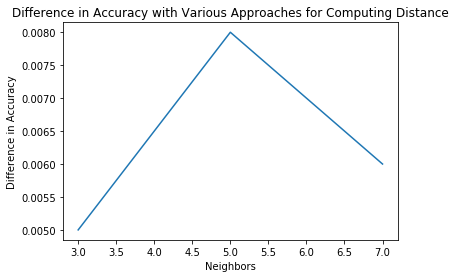

In [112]:
diff_in_dist=[]
for i in neighbor_range:
    diff_in_dist.append(acc(i)-acc_diff_dist(i)) #computing the difference in accuracy between two distance functions
plt.plot(neighbor_range,diff_in_dist)
plt.xlabel("Neighbors")
plt.ylabel("Difference in Accuracy")
plt.title("Difference in Accuracy with Various Approaches for Computing Distance")
plt.show()

From the plot above, it demonstrates the differnce in accuracy with differnt approaches for computing distance. The values on the y-axis is the differnce in accuracy, and the x-axis is the amount of neighbors used in the calculation. It seems like the differnce is marginal with all of them being less than one percent. In addition, the amounts of neighbors also not very relavant since it the accuracy does not have a contant increase or decrease as the amount of neighbor increases. However, one attribute worthing noting is that the differences are all positive, which indicates that the distance function defined in the previous section always have higher accuracy than the one in this section. Therefore, it might be slightly better to implement `knn` using the previous one.

## An Extreme Case

There's one extreme case of this function. The size of the training data was $60000$, which is almost the entire data set. The amount of neighbor used is also the highest in this report. The accuracy is almost perfect with a little bit more than one percent off. This accentuates the postitive association discussed earlier in this report. 

In [114]:
acc_for_plots(60000, 11)

0.984

## Conclusion

After exploring all the different combination of experiments. The findings of the relationship between various sizes training data and neighbors is that accuracy increases as the size increases. In contrast, the amount of neighbors seem to an insignificant factor to the accuracy of this function. The outcome of the experiments with two distance functions' approaches is that the discrepency is very marginal. However, there does seem to be a more optimal approach since the first one was consistently getting better accuracy than the later one. In the very last case, even though a huge amount of data was given it could still not reach $100$ percent, which means the machine can never be perfect, but it could reach a very high accuracy when extremely large amount of data was given. In conclustion, machine learning is indeed a devilishly powerful tool to make predictions, however, the result is never going to be $100$ percent accurate, even with the supervised model used in this report. Therefore, there's definitely rooms for improvements, additionaly, it should be uses with caution to not overlook any potentially valueable data point.